# Networkx example
> A tutorial of fastpages for Jupyter notebooks.

- toc: true 
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- image: images/chart-preview.png

# About

This notebook is a demonstration of some of capabilities of [fastpages](https://github.com/fastai/fastpages) with notebooks.


With `fastpages` you can save your jupyter notebooks into the `_notebooks` folder at the root of your repository, and they will be automatically be converted to Jekyll compliant blog posts!

## Front Matter

Front Matter is a markdown cell at the beginning of your notebook that allows you to inject metadata into your notebook. For example:

- Setting `toc: true` will automatically generate a table of contents
- Setting `badges: true` will automatically include GitHub and Google Colab links to your notebook.
- Setting `comments: true` will enable commenting on your blog post, powered by [utterances](https://github.com/utterance/utterances).

More details and options for front matter can be viewed on the [front matter section](https://github.com/fastai/fastpages#front-matter-related-options) of the README.

## Markdown Shortcuts

put a `#hide` flag at the top of any cell you want to completely hide in the docs

put a `#collapse` flag at the top of any cell if you want to hide that cell by default, but stil have it be visible to the reader:

In [1]:
#import asdfasdfsadf
import pandas as pd
import altair as alt
import networkx

put a `#collapse_show` flag at the top of any cell if you want to **show** that cell by default, but give the reader the option to hide it:

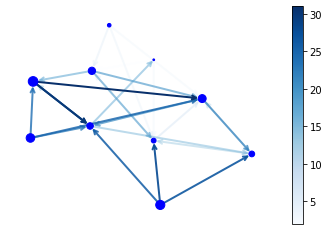

In [5]:
#collapse

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

## Interactive Charts With Altair

Charts made with Altair remain interactive.  Example charts taken from [this repo](https://github.com/uwdata/visualization-curriculum), specifically [this notebook](https://github.com/uwdata/visualization-curriculum/blob/master/altair_interaction.ipynb).

In [3]:
# hide
df = pd.read_json(movies) # load movies data
genres = df['Major_Genre'].unique() # get unique field values
genres = list(filter(lambda d: d is not None, genres)) # filter out None values
genres.sort() # sort alphabetically

In [4]:
#hide
mpaa = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Not Rated']

### Example 1: DropDown

In [5]:
# single-value selection over [Major_Genre, MPAA_Rating] pairs
# use specific hard-wired values as the initial selected values
selection = alt.selection_single(
    name='Select',
    fields=['Major_Genre', 'MPAA_Rating'],
    init={'Major_Genre': 'Drama', 'MPAA_Rating': 'R'},
    bind={'Major_Genre': alt.binding_select(options=genres), 'MPAA_Rating': alt.binding_radio(options=mpaa)}
)
  
# scatter plot, modify opacity based on selection
alt.Chart(movies).mark_circle().add_selection(
    selection
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y='IMDB_Rating:Q',
    tooltip='Title:N',
    opacity=alt.condition(selection, alt.value(0.75), alt.value(0.05))
)

alt.Chart(...)

### Example 2: Tooltips

In [6]:
alt.Chart(movies).mark_circle().add_selection(
    alt.selection_interval(bind='scales', encodings=['x'])
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y=alt.Y('IMDB_Rating:Q', axis=alt.Axis(minExtent=30)), # use min extent to stabilize axis title placement
    tooltip=['Title:N', 'Release_Date:N', 'IMDB_Rating:Q', 'Rotten_Tomatoes_Rating:Q']
).properties(
    width=600,
    height=400
)

alt.Chart(...)

### Example 3: More Tooltips

In [7]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q', scale=alt.Scale(type='log')),
    alt.Color('symbol:N')
)

alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='date:T'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='price:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='price:Q'
    ).transform_filter(label),
    
    data=stocks
).properties(
    width=700,
    height=400
)

alt.LayerChart(...)

## Data Tables

You can display tables per the usual way in your blog:

In [18]:
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
df = pd.read_json(movies)
# display table with pandas
df[['Title', 'Worldwide_Gross', 
    'Production_Budget', 'IMDB_Rating']].head()

,Title,Worldwide_Gross,Production_Budget,IMDB_Rating
0,The Land Girls,146083.0,8000000.0,6.1
1,"First Love, Last Rites",10876.0,300000.0,6.9
2,I Married a Strange Person,203134.0,250000.0,6.8
3,Let's Talk About Sex,373615.0,300000.0,NaN
4,Slam,1087521.0,1000000.0,3.4


## Images

### Local Images

You can reference local images and they will be copied and rendered on your blog automatically.  You can include these with the following markdown syntax:

`![](my_icons/fastai_logo.png)`

![](my_icons/fastai_logo.png)

### Remote Images

Remote images can be included with the following markdown syntax:

`![](https://image.flaticon.com/icons/svg/36/36686.svg)`

![](https://image.flaticon.com/icons/svg/36/36686.svg)

### Animated Gifs

Animated Gifs work, too!

`![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)`

![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)

### Captions

You can include captions with markdown images like this:

```
![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")
```


![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")





# Other Elements

## Tweetcards

Typing `> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20` will render this:

> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20

## Youtube Videos

Typing `> youtube: https://youtu.be/XfoYk_Z5AkI` will render this:


> youtube: https://youtu.be/XfoYk_Z5AkI

## Boxes / Callouts 

Typing `> Warning: There will be no second warning!` will render this:


> Warning: There will be no second warning!



Typing `> Important: Pay attention! It's important.` will render this:

> Important: Pay attention! It's important.



Typing `> Tip: This is my tip.` will render this:

> Tip: This is my tip.



Typing `> Note: Take note of this.` will render this:

> Note: Take note of this.



Typing `> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.` will render in the docs:

> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.